##Bitcoin Price prediction using Facebook Prophet

In [ ]:
!pip install fbprophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing Necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
!pip install prophet
from prophet import Prophet
import pandas as pd
import plotly.express as px

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = "colab"

## Importing the Dataset & Exploring it

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bitcoin_data.csv to bitcoin_data.csv


In [ ]:
#read_csv function from pandas
import pandas as pd

df= pd.read_csv('bitcoin_data.csv')
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1705 non-null   object 
 1   Close   1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [ ]:
df.describe()

,Close
count,1705.000000
mean,5455.314499
std,3962.263892
min,357.530000
25%,1062.150000
50%,6005.050000
75%,8624.280000
max,19650.010000


# Data Visualization

In [ ]:
# Area graph (Date Vs Price)
import plotly.express as px
px.area(df, x='Date', y='Close')

In [ ]:
# Violin plot
px.violin(df, y='Close')

# Creating Facebook Prophet Model

## Data Preperation

In [ ]:
df.columns

Index(['Date', 'Close'], dtype='object')

In [ ]:
prophet_df=df.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

## Modelling

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3w8vk5x_/erxdgmch.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3w8vk5x_/cwht0n72.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43636', 'data', 'file=/tmp/tmp3w8vk5x_/erxdgmch.json', 'init=/tmp/tmp3w8vk5x_/cwht0n72.json', 'output', 'file=/tmp/tmp3w8vk5x_/prophet_modelcrhtnhmf/prophet_model-20240716060328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:03:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:03:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1097.229048,-62.469018,2609.743750,1097.229048,1097.229048,252.072989,252.072989,252.072989,-3.414222,-3.414222,-3.414222,255.487210,255.487210,255.487210,0.0,0.0,0.0,1349.302037
1,2016-01-02,1092.799955,-152.501708,2704.233035,1092.799955,1092.799955,234.526332,234.526332,234.526332,15.189991,15.189991,15.189991,219.336341,219.336341,219.336341,0.0,0.0,0.0,1327.326287
2,2016-01-03,1088.370861,-139.463402,2595.578688,1088.370861,1088.370861,176.309857,176.309857,176.309857,-9.008198,-9.008198,-9.008198,185.318056,185.318056,185.318056,0.0,0.0,0.0,1264.680718
3,2016-01-04,1083.941767,-163.824126,2591.300212,1083.941767,1083.941767,172.161024,172.161024,172.161024,18.540795,18.540795,18.540795,153.620229,153.620229,153.620229,0.0,0.0,0.0,1256.102791
4,2016-01-05,1079.512673,-140.186476,2551.876160,1079.512673,1079.512673,120.113360,120.113360,120.113360,-4.189440,-4.189440,-4.189440,124.302800,124.302800,124.302800,0.0,0.0,0.0,1199.626033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2020-09-26,9060.258108,7679.086030,10395.619966,8996.553826,9086.379588,-6.364719,-6.364719,-6.364719,15.189991,15.189991,15.189991,-21.554710,-21.554710,-21.554710,0.0,0.0,0.0,9053.893388
1731,2020-09-27,9060.791921,7554.970980,10601.070033,8987.389069,9091.084905,-71.297186,-71.297186,-71.297186,-9.008198,-9.008198,-9.008198,-62.288988,-62.288988,-62.288988,0.0,0.0,0.0,8989.494735
1732,2020-09-28,9061.325734,7552.491791,10436.271064,8980.133192,9097.942571,-84.208891,-84.208891,-84.208891,18.540795,18.540795,18.540795,-102.749686,-102.749686,-102.749686,0.0,0.0,0.0,8977.116843
1733,2020-09-29,9061.859547,7511.745002,10395.831444,8971.625651,9105.131354,-146.815422,-146.815422,-146.815422,-4.189440,-4.189440,-4.189440,-142.625983,-142.625983,-142.625983,0.0,0.0,0.0,8915.044125


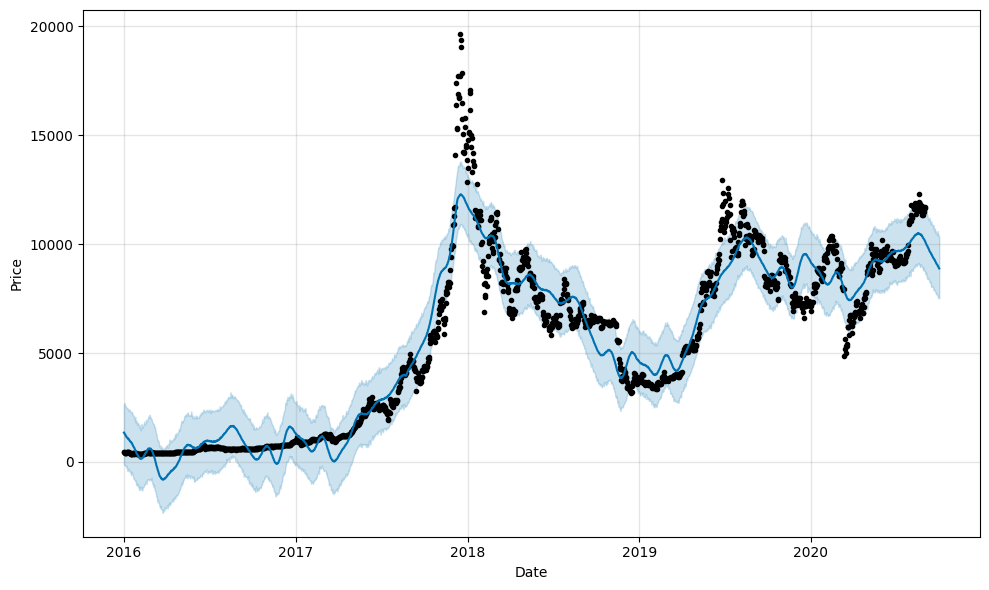

In [ ]:
figure =m.plot(forecast,xlabel='Date',ylabel='Price')

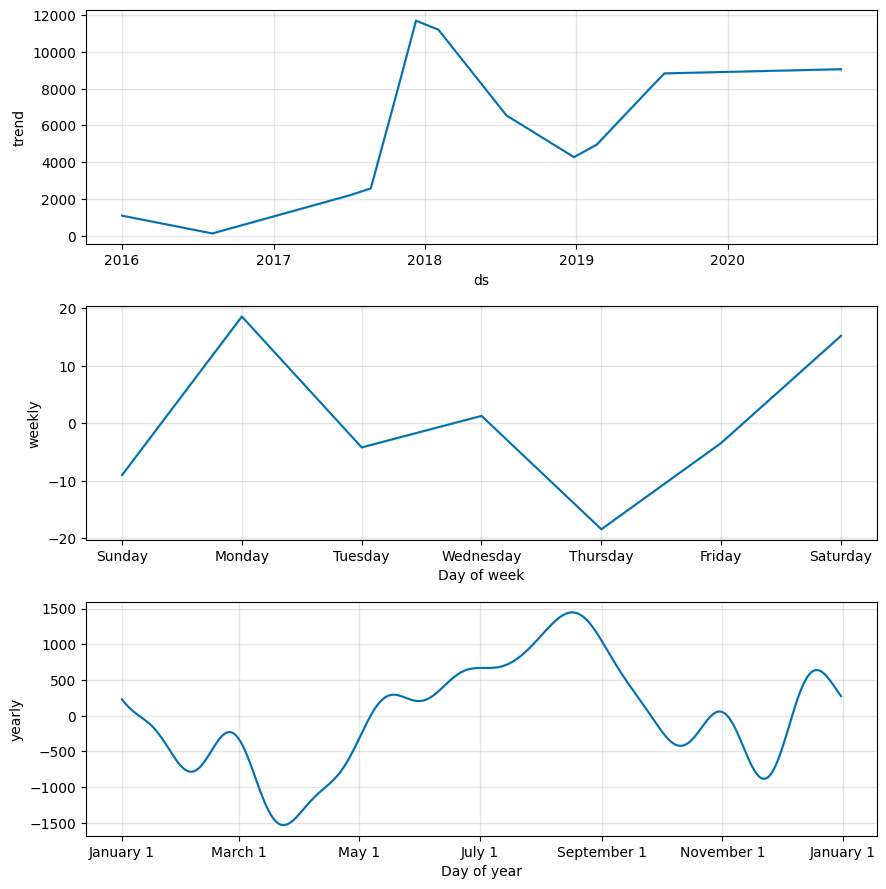

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
forecast.to_csv('forecast.csv')
from google.colab import files
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#COMPARE WITH REALTIME DATA IN GOOGLE FINANCE